In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb
from camb import model, initialpower

In [2]:
pars = camb.CAMBparams()
# print(pars)
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

In [3]:
results = camb.get_results(pars)

In [4]:
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
# for name in powers: print(name)

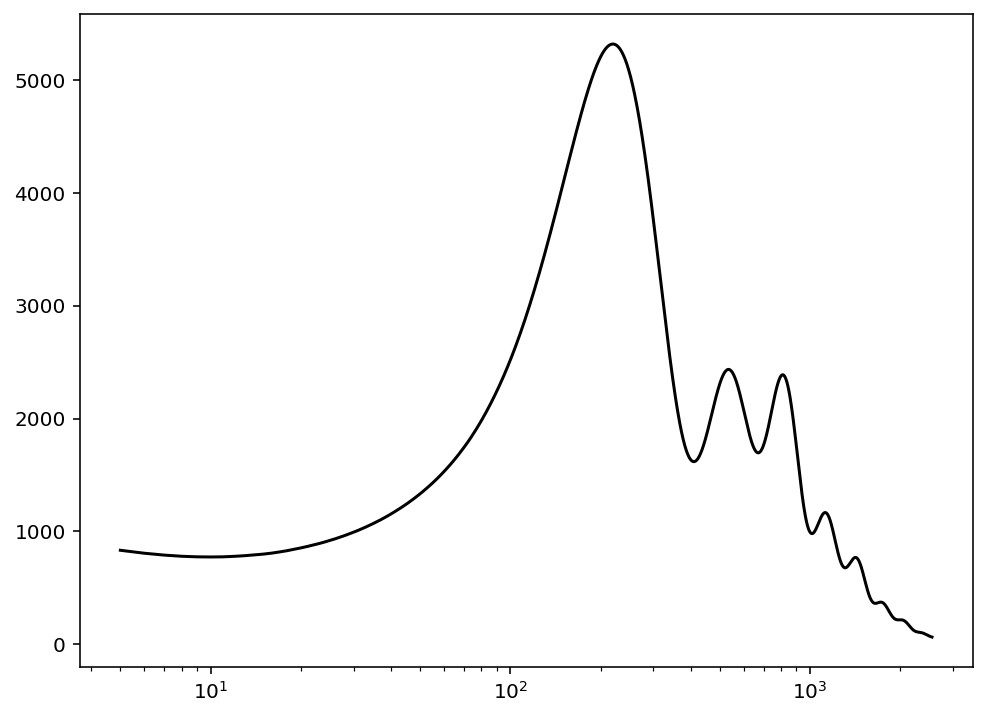

In [5]:
totCL=powers['total']
ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots(figsize = (8,6))
ax.semilogx(ls[5:],totCL[:,0][5:], color='k')

In [13]:
ks = np.logspace(-5.5, 2, 1000)
def PK(k, As, ns):
    return As * (((k / 0.05) ** (ns - 1)) + (2 * (k/0.05))) 

pars.set_initial_power_function(PK, args=(3e-9, 0.95))
P = pars.scalar_power(ks)
np.testing.assert_almost_equal(P, PK(ks, 3e-9, 0.95), decimal=4)

In [14]:
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')

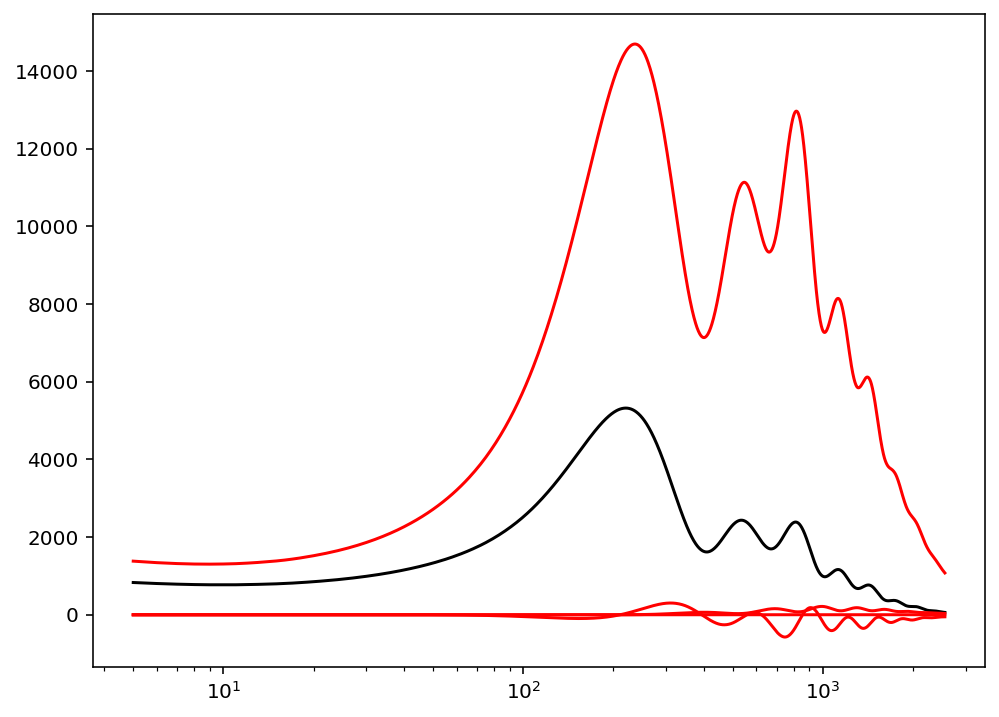

In [15]:
totCL1=powers['total']
ls1 = np.arange(totCL.shape[0])
fig, ax = plt.subplots(figsize = (8,6))
ax.semilogx(ls[5:],totCL[:,0][5:],'k', ls1[5:], totCL1[5:], 'r')